<a href="https://colab.research.google.com/github/jigarsanghavi/fastai_maskdetector/blob/master/maskdetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install mtcnn

In [0]:
pip install geocoder

In [0]:
import pandas as pd
import numpy as np
import os, shutil
from fastai.vision import *
from fastai.widgets import ClassConfusion
import cv2
from PIL import Image

In [0]:
!unzip croped_mask.zip -d data/mask

Archive:  croped_mask.zip
 extracting: data/mask/1.png         
 extracting: data/mask/2.png         
 extracting: data/mask/5.png         
 extracting: data/mask/9.png         
 extracting: data/mask/10.png        
 extracting: data/mask/11.png        
 extracting: data/mask/12.png        
 extracting: data/mask/13.png        
 extracting: data/mask/14.png        
 extracting: data/mask/16.png        
 extracting: data/mask/17.png        
 extracting: data/mask/18.png        
 extracting: data/mask/19.png        
 extracting: data/mask/20.png        
 extracting: data/mask/22.png        
 extracting: data/mask/23.png        
 extracting: data/mask/24.png        
 extracting: data/mask/25.png        
 extracting: data/mask/26.png        
 extracting: data/mask/27.png        
 extracting: data/mask/28.png        
 extracting: data/mask/29.png        
 extracting: data/mask/30.png        
 extracting: data/mask/31.png        
 extracting: data/mask/32.png        
 extracting: data/mask/3

In [0]:
!unzip croped_no_mask.zip -d data/no_mask

Archive:  croped_no_mask.zip
 extracting: data/no_mask/1.png      
 extracting: data/no_mask/2.png      
 extracting: data/no_mask/3.png      
 extracting: data/no_mask/4.png      
 extracting: data/no_mask/5.png      
 extracting: data/no_mask/6.png      
 extracting: data/no_mask/7.png      
 extracting: data/no_mask/8.png      
 extracting: data/no_mask/9.png      
 extracting: data/no_mask/10.png     
 extracting: data/no_mask/11.png     
 extracting: data/no_mask/12.png     
 extracting: data/no_mask/13.png     
 extracting: data/no_mask/14.png     
 extracting: data/no_mask/15.png     
 extracting: data/no_mask/16.png     
 extracting: data/no_mask/17.png     
 extracting: data/no_mask/18.png     
 extracting: data/no_mask/19.png     
 extracting: data/no_mask/20.png     
 extracting: data/no_mask/21.png     
 extracting: data/no_mask/22.png     
 extracting: data/no_mask/23.png     
 extracting: data/no_mask/24.png     
 extracting: data/no_mask/25.png     
 extracting: data/no_

In [0]:
classes=['mask','no_mask']

In [0]:
data = ImageDataBunch.from_folder('data', train=".", valid_pct=0.25,
        ds_tfms=get_transforms(), bs=8, size=512, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['mask', 'no_mask']

In [0]:
print(len(data.train_ds),len(data.valid_ds))

2068 689


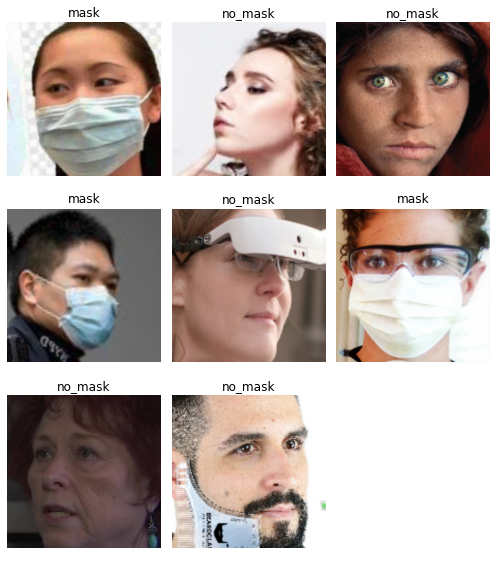

In [0]:
data.show_batch(rows=5, figsize=(7,8))

In [0]:
precision=Precision()
recall=Recall()
AUC=AUROC()

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=(accuracy,precision,recall,AUC))

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [0]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,precision,recall,auroc,time
0,0.463395,0.243180,0.923077,0.941667,0.913747,0.976708,01:58
1,0.357855,0.157632,0.937591,0.950549,0.932615,0.985540,01:52
2,0.293515,0.125721,0.960813,0.972527,0.954178,0.989752,01:52
3,0.246876,0.077724,0.981132,0.981183,0.983827,0.995347,01:52
4,0.210554,0.049544,0.984035,0.978723,0.991914,0.998118,01:52
5,0.186138,0.034572,0.988389,0.991870,0.986523,0.998779,01:52
6,0.125920,0.040563,0.988389,0.986595,0.991914,0.998788,01:52
7,0.163547,0.036963,0.988389,0.984000,0.994609,0.998237,01:52
8,0.128471,0.032322,0.991292,0.989276,0.994609,0.998559,01:52
9,0.087540,0.032993,0.991292,0.989276,0.994609,0.998483,01:52


In [0]:
learn.save('learn')

In [0]:
learn.export()

In [0]:
path = learn.path
print(path)

data


In [0]:
pip install mtcnn

     |████████████████████████████████| 2.3MB 15.1MB/s 


In [0]:
pip install geocoder

     |████████████████████████████████| 102kB 13.0MB/s 


In [0]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  resp = urllib.request.urlopen(data)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  # return the image
  return image
  image = take_photo()
#image= cv2.imread(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image1 = Image(pil2tensor(image, dtype=np.float32).div_(255))

In [0]:
from datetime import datetime
import geocoder
g = geocoder.ip('me')
a=str(g.latlng[0])
b=str(g.latlng[1])
c='GPS::'+a+' '+b


import cv2
from mtcnn.mtcnn import MTCNN
detector = MTCNN()


import numpy as np
#from keras.preprocessing.image import img_to_array



font = cv2.FONT_HERSHEY_TRIPLEX
font2 = cv2.FONT_HERSHEY_COMPLEX_SMALL
font3 = cv2.FONT_HERSHEY_SCRIPT_COMPLEX
font4 = cv2.FONT_HERSHEY_SIMPLEX
#image_file = load_img('test_img.jpg')
cap = cv2.VideoCapture(0)
#print(chr(169))
#rights=chr(169)+'2020'
predicted_class = []
while True: 
    
    #Capture frame-by-frame
    __, frame = cap.read()
    
    cv2.putText(frame,str(datetime.now()),(10,30), font3, 1,(255,255,255),2,cv2.LINE_AA)
    cv2.putText(frame,c,(10,450), font2, 1,(255,255,255),2,cv2.LINE_AA)
    cv2.putText(frame,'CAM',(480,450), font2, 0.9,(255,255,255),2,cv2.LINE_AA)
    #Use MTCNN to detect faces
    result = detector.detect_faces(frame)
    if result != []:
        for person in result:
            bounding_box = person['box']
            keypoints = person['keypoints']
            cv2.imwrite('opencv.png', frame)
            image = open_image('opencv.png')
            #image_file = load_img('opencv.png')
            pred_class = learn.predict(image)
            predicted_class.append(str(pred_class[0]))
            for class1 in predicted_class:
              if class1=='mask':
                cv2.putText(frame,"ACCESS GRANTED, MASK ON",(100,100), font4, 0.8,(0,255,0),2,cv2.LINE_AA)
              else:
                cv2.putText(frame,"ACCESS DENIED, No FACE-MASK",(100,100), font4, 0.8,(0,0,255),2,cv2.LINE_AA)
            cv2.circle(frame,(keypoints['left_eye']), 2, (0,155,255), 2)
            cv2.circle(frame,(keypoints['right_eye']), 2, (0,155,255), 2)
            cv2.circle(frame,(keypoints['nose']), 2, (0,155,255), 2)
            cv2.circle(frame,(keypoints['mouth_left']), 2, (0,155,255), 2)
            cv2.circle(frame,(keypoints['mouth_right']), 2, (0,155,255), 2)
    #display resulting frame
    cv2.imshow('frame',frame)
    if cv2.waitKey(10) &0xFF == ord('q'):
        break
#When everything's done, release capture
cap.release()
cv2.destroyAllWindows()

{'box': [81, 83, 139, 185], 'confidence': 0.9996115565299988, 'keypoints': {'left_eye': (117, 153), 'right_eye': (183, 151), 'nose': (152, 185), 'mouth_left': (133, 230), 'mouth_right': (177, 227)}}
['mask']


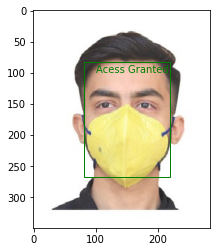

In [0]:
#for images
from mtcnn import MTCNN
from matplotlib.patches import Rectangle
detector = MTCNN()
filename = 'yellow.jpg'
image = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
image1 = open_image(filename)
faces = detector.detect_faces(image)
predicted_class = []
for face in faces:
    print(face)
    pred_class = learn.predict(image1)
    predicted_class.append(str(pred_class[0]))
print(predicted_class)
for class1 in predicted_class:
  if class1 == 'mask':
    plt.text(100,100,'Acess Granted',color = 'Green')
  else:
    plt.text(100,100,'Acess Denied',color='red')

plt.imshow(image)
for class1 in predicted_class:
  if class1 == 'mask':
    ax = plt.gca()
    for face in faces:
      x, y, width, height = face['box']
      face_border = Rectangle((x, y), width, height,fill=False, color='Green')
      ax.add_patch(face_border)
  else:
    ax = plt.gca()
    for face in faces:
      x, y, width, height = face['box']
      face_border = Rectangle((x, y), width, height,fill=False, color='red')
      ax.add_patch(face_border)

predicted_class = 0    

plt.show()

In [0]:
from mtcnn import MTCNN
from matplotlib.patches import Rectangle
def maskdectector(file_name):
  detector = MTCNN()
  image = cv2.cvtColor(cv2.imread(file_name), cv2.COLOR_BGR2RGB)
  image1 = open_image(file_name)
  faces = detector.detect_faces(image)
  predicted_class = []
  for face in faces:
      print(face)
      pred_class = learn.predict(image1)
      predicted_class.append(str(pred_class[0]))
  print(predicted_class)
  for class1 in predicted_class:
    if class1 == 'mask':
      plt.text(0,0,'Acess Granted: MASk',color = 'Green')
    else:
      plt.text(0,0,'Acess Denied: NO MASK',color='red')

  plt.imshow(image)
  for class1 in predicted_class:
    if class1 == 'mask':
      ax = plt.gca()
      for face in faces:
        x, y, width, height = face['box']
        face_border = Rectangle((x, y), width, height,fill=False, color='Green')
        ax.add_patch(face_border)
    else:
      ax = plt.gca()
      for face in faces:
        x, y, width, height = face['box']
        face_border = Rectangle((x, y), width, height,fill=False, color='red')
        ax.add_patch(face_border)

  predicted_class = 0    

  plt.show()

{'box': [81, 83, 139, 185], 'confidence': 0.9996115565299988, 'keypoints': {'left_eye': (117, 153), 'right_eye': (183, 151), 'nose': (152, 185), 'mouth_left': (133, 230), 'mouth_right': (177, 227)}}
['mask']


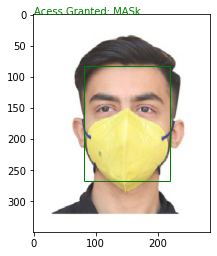

In [0]:
maskdectector('yellow.jpg')

{'box': [131, 44, 217, 296], 'confidence': 0.9991828799247742, 'keypoints': {'left_eye': (188, 166), 'right_eye': (291, 165), 'nose': (237, 228), 'mouth_left': (200, 279), 'mouth_right': (282, 278)}}
['no_mask']


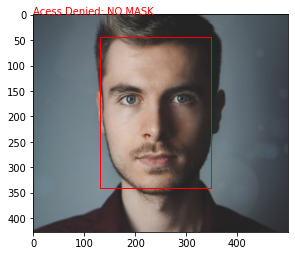

In [0]:
maskdectector('withoutmasktest1.jpeg')

{'box': [32, 28, 106, 144], 'confidence': 0.9997206330299377, 'keypoints': {'left_eye': (53, 91), 'right_eye': (103, 86), 'nose': (72, 113), 'mouth_left': (60, 142), 'mouth_right': (102, 139)}}
['mask']


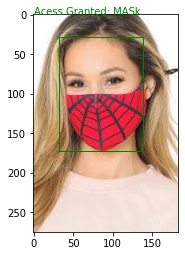

In [0]:
maskdectector('red2.jpg')

<class 'fastai.vision.image.Image'>
(Category no_mask, tensor(1), tensor([0.0029, 0.9971]))


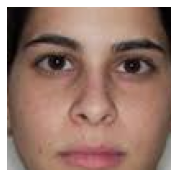

In [0]:
img_cv2 = cv2.imread('test5.jpg')
img_cv2 = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
img_fastai = Image(pil2tensor(img_cv2, dtype=np.float32).div_(255))
img_fastai = img_fastai.crop((100,100,100,100))
img_fastai.show()
print(type(img_fastai))
pred_class = learn.predict(img_fastai)
print(pred_class)
